# Cardiovascular Disease Prediction
Cardiovascular Study Dataset: The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Main Question of Analysis:
***What are the key predictors of the 10-year risk of coronary heart disease (CHD) among the given demographic, behavioral, and medical variables?***

Demographics and Risk:
- How does age or sex impact the 10-year risk of CHD?
- Are there noticeable trends in age or sex distribution among those at risk?

Behavioral Factors:
- Does smoking status correlate with higher cholesterol, blood pressure, or glucose levels?
- How does the number of cigarettes per day impact these health indicators?

Medical History and Current Conditions:
- Is there a stronger association between certain medical history factors (e.g., diabetes, hypertension) and the risk of CHD?
- How do current medical measurements (e.g., BMI, glucose) differ between those at risk and those not at risk?

# Importing Libaries

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import (
    root_mean_squared_error,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    accuracy_score,
)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
from scipy.stats import zscore, norm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Data Loading and Cleaning

In [ ]:
file_path = "train.csv"
df = pd.read_csv(file_path)
df.shape

(3390, 17)

Data overview

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [329]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [ ]:
df["sex"] = df["sex"].map({"F": 1, "M": 0})
df.rename(columns={"sex": "is_female"}, inplace=True)

df["is_smoking"] = df["is_smoking"].map({"YES": 1, "NO": 0})

In [331]:
df.describe()

,id,age,education,is_female,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390.000000,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,0.567257,0.497640,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,0.495529,0.500068,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Dublicates and missing values

This section will be checking missing values, dublicates and drops unnessecary columns

In [ ]:
df_train = df.copy()

In [ ]:
def clean_data(df_train):

    missing_count = df_train.isnull().sum().sum()
    duplicate_count = df_train.duplicated().sum()

    if "Unnamed: 0" in df_train.columns:
        df_train.drop(columns=["Unnamed: 0"], inplace=True)
        print("Dropped column: 'Unnamed: 0'.")

    print(f"Missing values in dataset: {missing_count}")
    print(f"Duplicate rows in dataset: {duplicate_count}")

    return df_train


df_train = clean_data(df_train)

Missing values in dataset: 510
Duplicate rows in dataset: 0


There are several missing values in dataset and needs futher investigation.

In [ ]:
def show_missing():
    missing = df_train.columns[df_train.isnull().any()].tolist()
    return missing


print("Missing Data Count")
print(df_train[show_missing()].isnull().sum().sort_values(ascending=False))
print("--" * 15)
print("Missing Data Percentage")
print(
    round(
        df_train[show_missing()].isnull().sum().sort_values(ascending=False)
        / len(df_train)
        * 100,
        2,
    )
)

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


### Handling Missing Values and Outliers in the Dataset:
- The dataset documentation does not provide information about the "education" column, which requires assumptions about its meaning. It would be more reliable to remove this column, especially because it does not have a significant impact on the target metric—CHD.
- Imputation: Missing values are replaced with mean.
- Outlier Removal: After conducting additional research (e.g., verifying if unusually high or low glucose levels are realistic in real life), I have decided that outliers are not treated in this database. Therefore, we maintain all data points, including those with extreme values.

The final dataset is cleaned and ready for further analysis or modeling.

In [ ]:
df_train_copy = df_train.copy()

df_train_copy = df_train_copy.drop(columns=["education"])

num_imputer = SimpleImputer(strategy="mean")

numerical_cols = ["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]

df_train_copy[numerical_cols] = num_imputer.fit_transform(df_train_copy[numerical_cols])

categorical_cols = [
    "BPMeds",
    "is_female",
    "is_smoking",
    "prevalentStroke",
    "prevalentHyp",
    "diabetes",
    "TenYearCHD",
]
df_train_copy[categorical_cols] = df_train_copy[categorical_cols].astype(int)

print(f"Missing values after replacement: {df_train_copy.isnull().sum().sum()}")
print("Number of rows after retaining outliers:", df_train_copy.shape[0])

Missing values after replacement: 0
Number of rows after retaining outliers: 3390


In [336]:
df_train_copy.head(10)

,id,age,is_female,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,1,1,3.0,0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.00000,1
1,1,36,0,0,0.0,0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.00000,0
2,2,46,1,1,10.0,0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.00000,0
3,3,50,0,1,20.0,0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.00000,1
4,4,64,1,1,30.0,0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.00000,0
5,5,61,1,0,0.0,0,0,1,0,272.0,182.0,121.0,32.800000,85.0,65.00000,1
6,6,61,0,0,0.0,0,0,1,0,238.0,232.0,136.0,24.830000,75.0,79.00000,0
7,7,36,0,1,35.0,0,0,0,0,295.0,102.0,68.0,28.150000,60.0,63.00000,0
8,8,41,1,1,20.0,0,0,0,0,220.0,126.0,78.0,20.700000,86.0,79.00000,0
9,9,55,1,0,0.0,0,0,1,0,326.0,144.0,81.0,25.710000,85.0,82.08652,0


# Exploratory Data Analysis

Demographics and Risk:
- How does age or sex impact the 10-year risk of CHD?
- Are there noticeable trends in age or sex distribution among those at risk?

Behavioral Factors:
- Does smoking status correlate with higher cholesterol, blood pressure, or glucose levels?
- How does the number of cigarettes per day impact these health indicators?

Medical History and Current Conditions:
- Is there a stronger association between certain medical history factors (e.g., diabetes, hypertension) and the risk of CHD?
- How do current medical measurements (e.g., BMI, glucose) differ between those at risk and those not at risk?

### **Demografics and Risks**
Overview about demografics and risks, focusing on questions:
- How does age or sex impact the 10-year risk of CHD?
- Are there noticeable trends in age or sex distribution among those at risk?

Distribution of Age and Sex in the Dataset

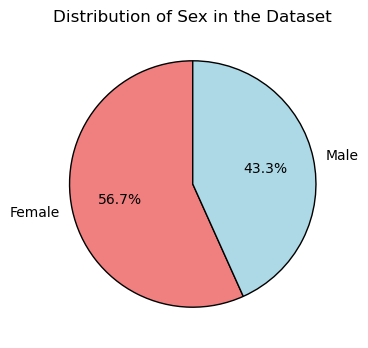

Dataset contains 1923 females.
Dataset contains 1467 males.


In [ ]:
sex_distribution = df_train_copy["is_female"].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(
    sex_distribution,
    labels=["Female", "Male"],
    autopct="%1.1f%%",
    colors=["lightcoral", "lightblue"],
    startangle=90,
    wedgeprops={"edgecolor": "black"},
)
plt.title("Distribution of Sex in the Dataset")
plt.show()

print(f"Dataset contains {sex_distribution[1]} females.")
print(f"Dataset contains {sex_distribution[0]} males.")

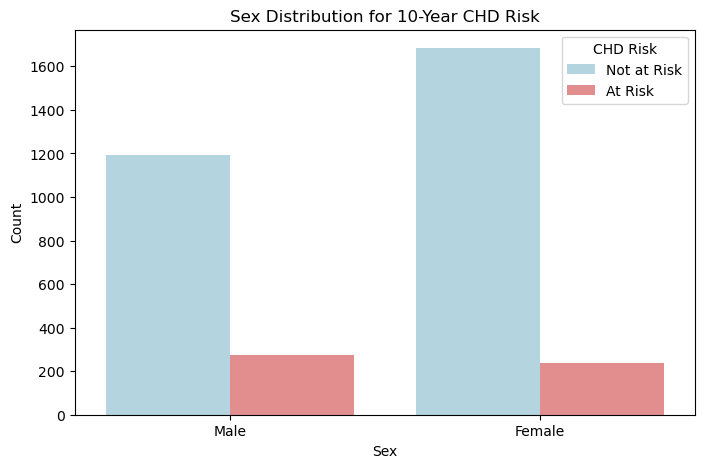

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x="is_female",
    hue="TenYearCHD",
    data=df_train_copy,
    palette={0: "lightblue", 1: "lightcoral"},
)
plt.title("Sex Distribution for 10-Year CHD Risk")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.legend(title="CHD Risk", labels=["Not at Risk", "At Risk"])
plt.show()

Sex Distribution for 10-Year CHD Risk shows, that men are at bigger CHD risk than women.

Age Distribution for 10-Year CHD Risk

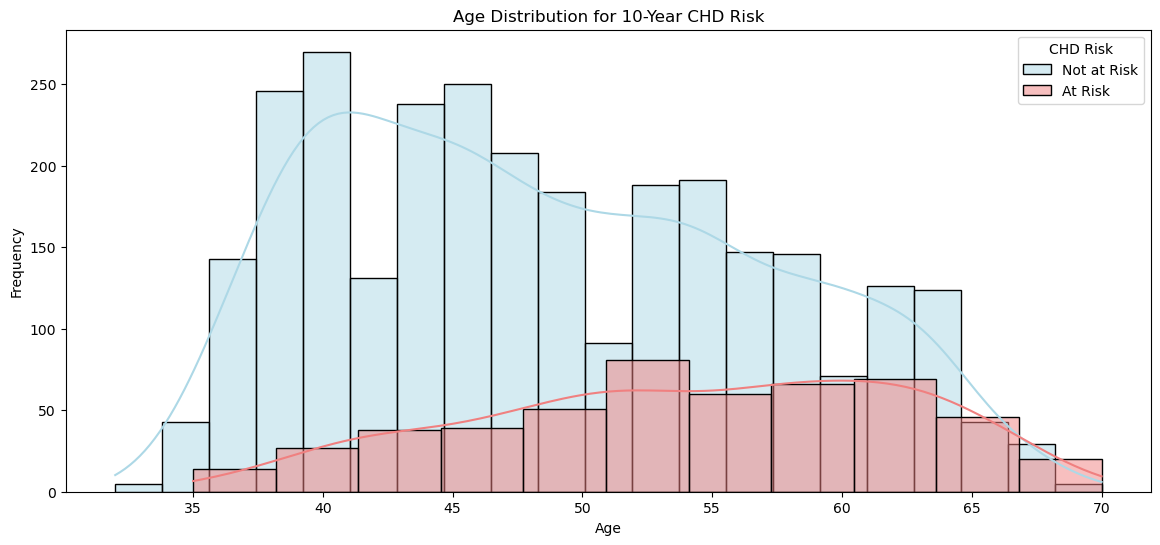

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(
    df_train_copy[df_train_copy["TenYearCHD"] == 0]["age"],
    kde=True,
    label="Not at Risk",
    color="lightblue",
)
sns.histplot(
    df_train_copy[df_train_copy["TenYearCHD"] == 1]["age"],
    kde=True,
    label="At Risk",
    color="lightcoral",
)
plt.legend(title="CHD Risk")
plt.title("Age Distribution for 10-Year CHD Risk")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Age correlating with CHD risk over a 10-year period: Majority "Not at Risk": The light blue bars, representing those "Not at Risk" of Coronary Heart Disease (CHD), dominate the histogram, showing a higher frequency compared to the light red bars of those "At Risk."
Peak "Not at Risk" Age Group: The age group with the highest frequency of "Not at Risk" individuals is around 45-50 years.
Increasing Risk with Age: The frequency of individuals "At Risk" increases with age, peaking around 55-60 years.
Density Curves: The density curves indicate that the risk of CHD increases with age, as the density curve for the "At Risk" category shifts towards older ages.

**Demographics and Risks conclusions**

Sex Impact on CHD Risk:
- Men are at a higher risk of CHD compared to women.

Age Impact on CHD Risk:
- The majority "Not at Risk" are aged 45-50.
- CHD risk increases with age, peaking around 55-60 years.

### **Behavioral Factors**
- Does smoking status correlate with higher cholesterol, blood pressure, or glucose levels?
- How does the number of cigarettes per day impact these health indicators?

Proportion of CHD Risk by Smoking Status

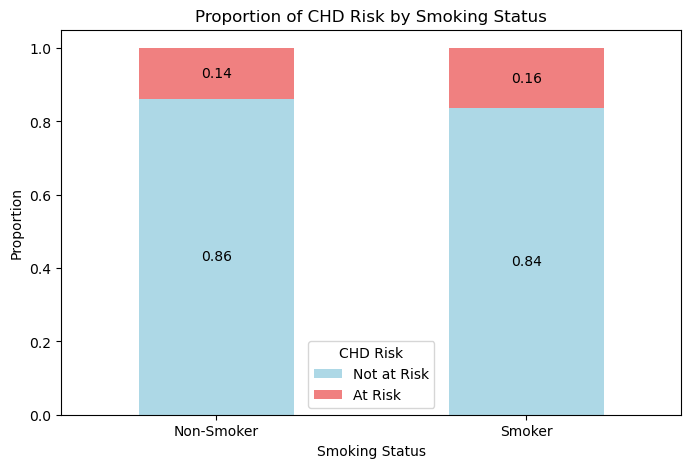

In [ ]:
smoking_risk = (
    df_train_copy.groupby(["is_smoking", "TenYearCHD"]).size().unstack().fillna(0)
)
smoking_risk_percentage = smoking_risk.div(smoking_risk.sum(axis=1), axis=0)

ax = smoking_risk_percentage.plot(
    kind="bar", stacked=True, figsize=(8, 5), color=["lightblue", "lightcoral"]
)

plt.title("Proportion of CHD Risk by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=["Non-Smoker", "Smoker"])
plt.xticks(rotation=0)
plt.legend(title="CHD Risk", labels=["Not at Risk", "At Risk"])

for container in ax.containers:
    ax.bar_label(container, label_type="center", fmt="%.2f")

plt.show()

Chart highlights that smokers have a slightly higher proportion of individuals at risk for CHD compared to non-smokers. This visually demonstrates the increased risk associated with smoking.

Distribution of Cigarettes per Day

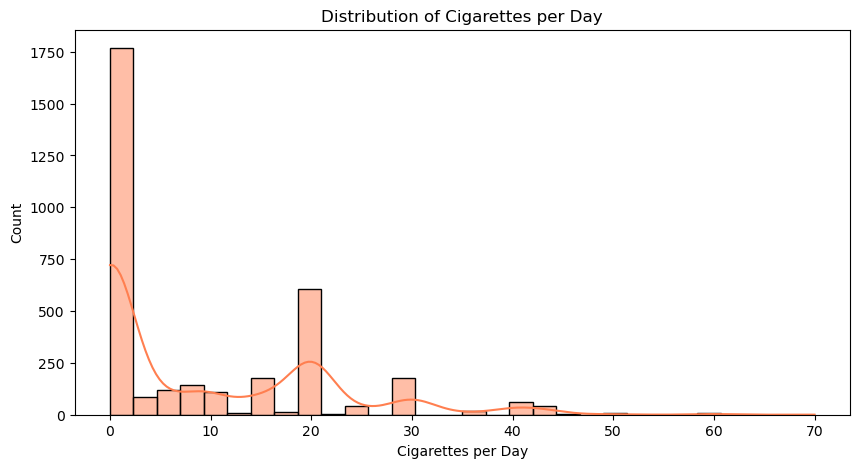

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train_copy["cigsPerDay"], bins=30, kde=True, color="coral")
plt.title("Distribution of Cigarettes per Day")
plt.xlabel("Cigarettes per Day")
plt.ylabel("Count")
plt.show()

Visual highlights the prevalence of non-smokers and the distribution of smoking habits among smokers within the population.
- Majority Non-Smokers: The highest bar is at 0 cigarettes per day, indicating that the majority of people in the dataset do not smoke.
- Distribution Peaks: There are smaller peaks at  15, 20 and 30 cigarettes per day, indicating groups of people who smoke these amounts.
- Density Estimate: The orange line overlays the histogram, representing a smoothed density estimate of the distribution. It shows that the most common smoking frequency is zero, with gradual peaks at certain smoking frequencies.

Well known health indicators by Smoking Status

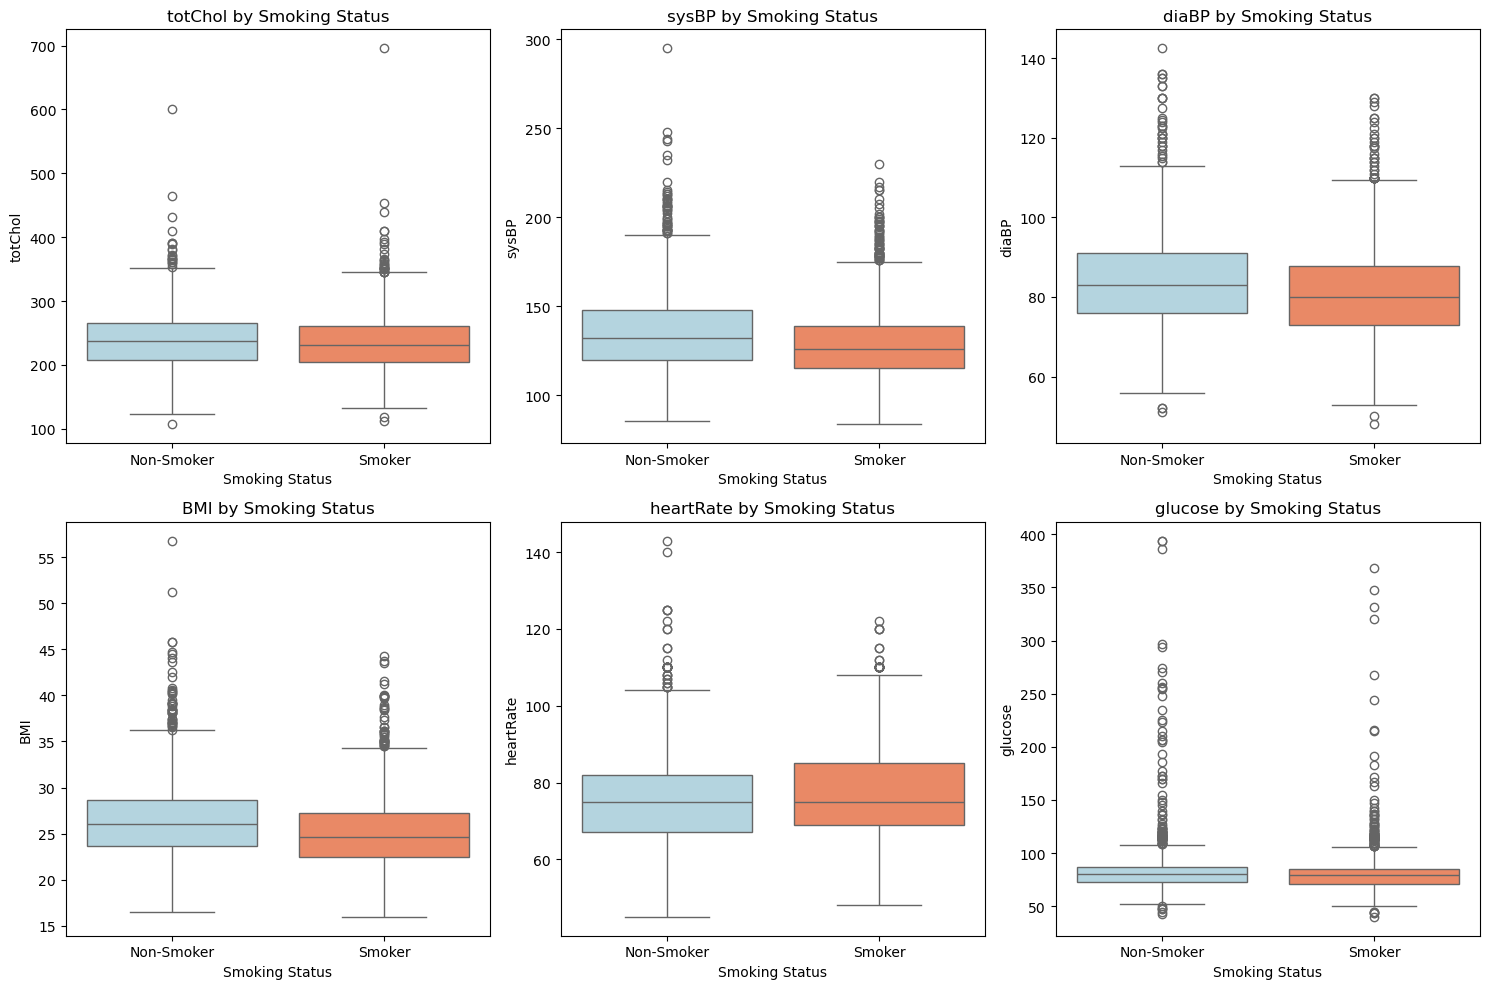

In [ ]:
plt.figure(figsize=(15, 10))
health_indicators = ["totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

for i, col in enumerate(health_indicators, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        x="is_smoking",
        y=col,
        data=df_train_copy,
        hue="is_smoking",
        palette=["lightblue", "coral"],
        dodge=False,
    )
    plt.title(f"{col} by Smoking Status")
    plt.xlabel("Smoking Status")
    plt.xticks(ticks=[0, 1], labels=["Non-Smoker", "Smoker"])
    plt.ylabel(col)
    plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

- Median Values: Similar between non-smokers and smokers.
- Range and Variability: Higher in smokers, with more outliers.

Well known health indicators vs Cigarettes per Day

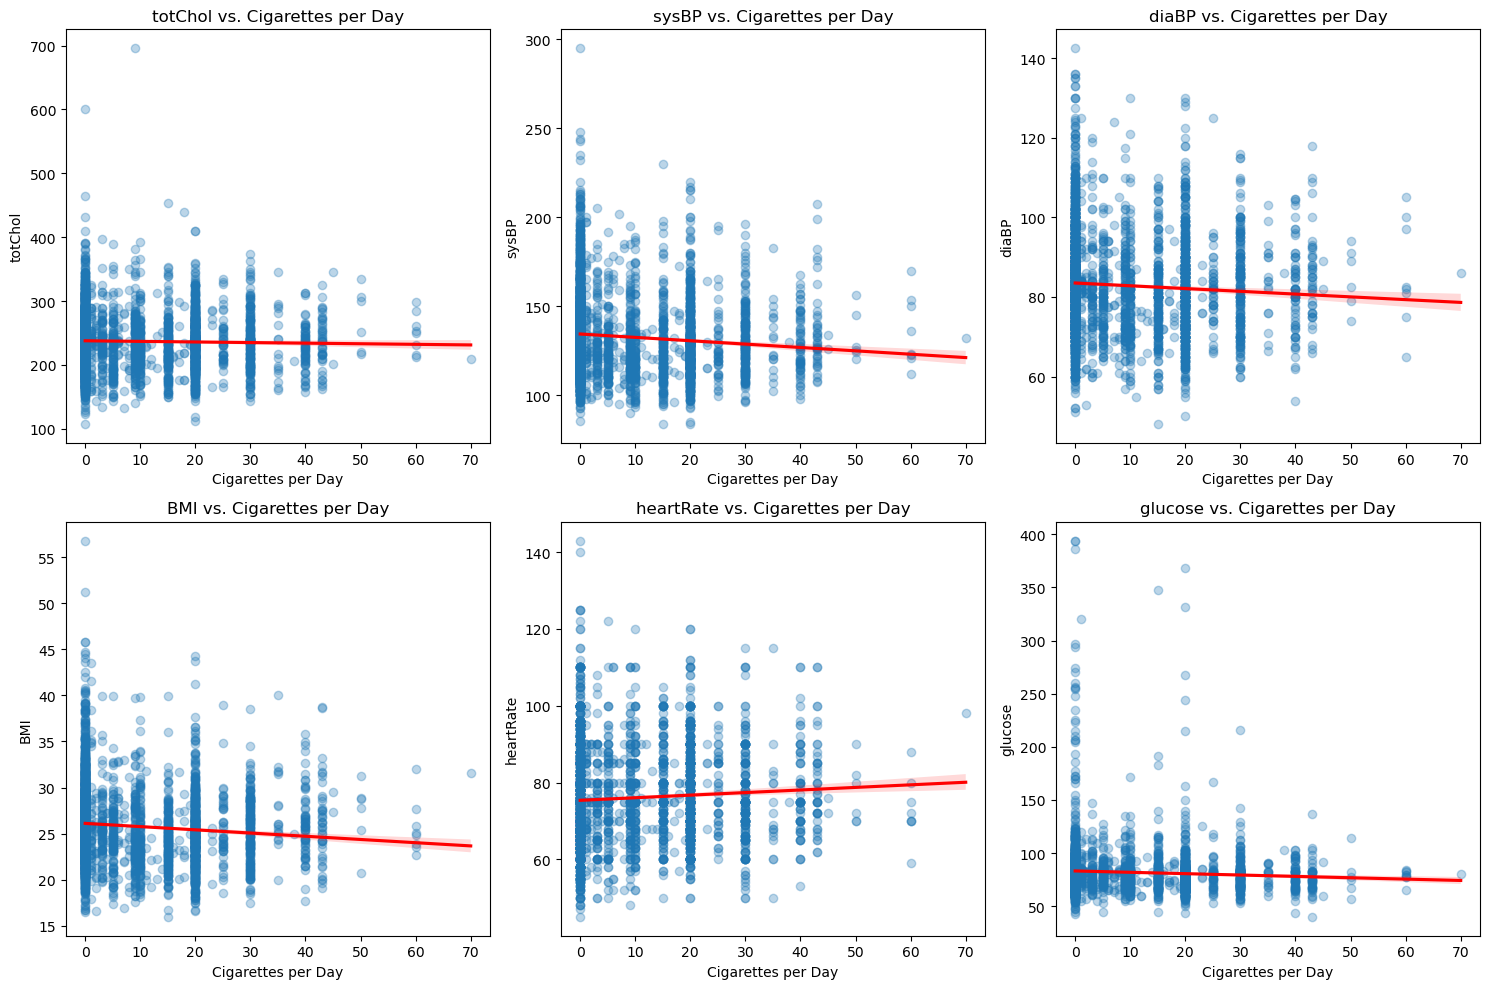

In [ ]:
plt.figure(figsize=(15, 10))
health_indicators = ["totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

for i, col in enumerate(health_indicators, 1):
    plt.subplot(2, 3, i)
    sns.regplot(
        x="cigsPerDay",
        y=col,
        data=df_train_copy,
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "red"},
    )
    plt.title(f"{col} vs. Cigarettes per Day")
    plt.xlabel("Cigarettes per Day")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

- Positive Correlations: Smoking is associated with increased total cholesterol, systolic and diastolic blood pressure, heart rate, and glucose levels.
- BMI: There is no clear trend between BMI and the number of cigarettes smoked.

**Conclusions for behavioral factors**
- Smoking status correlates with higher cholesterol, blood pressure, and glucose levels.
- No significant impact of the number of cigarettes per day on these health indicators is observed in the scatter plots.

### **Medical History and Current Conditions:**
- Is there a stronger association between certain medical history factors (e.g., diabetes, hypertension) and the risk of CHD?
- How do current medical measurements (e.g., BMI, glucose) differ between those at risk and those not at risk?

Medical factors by CHD Risk

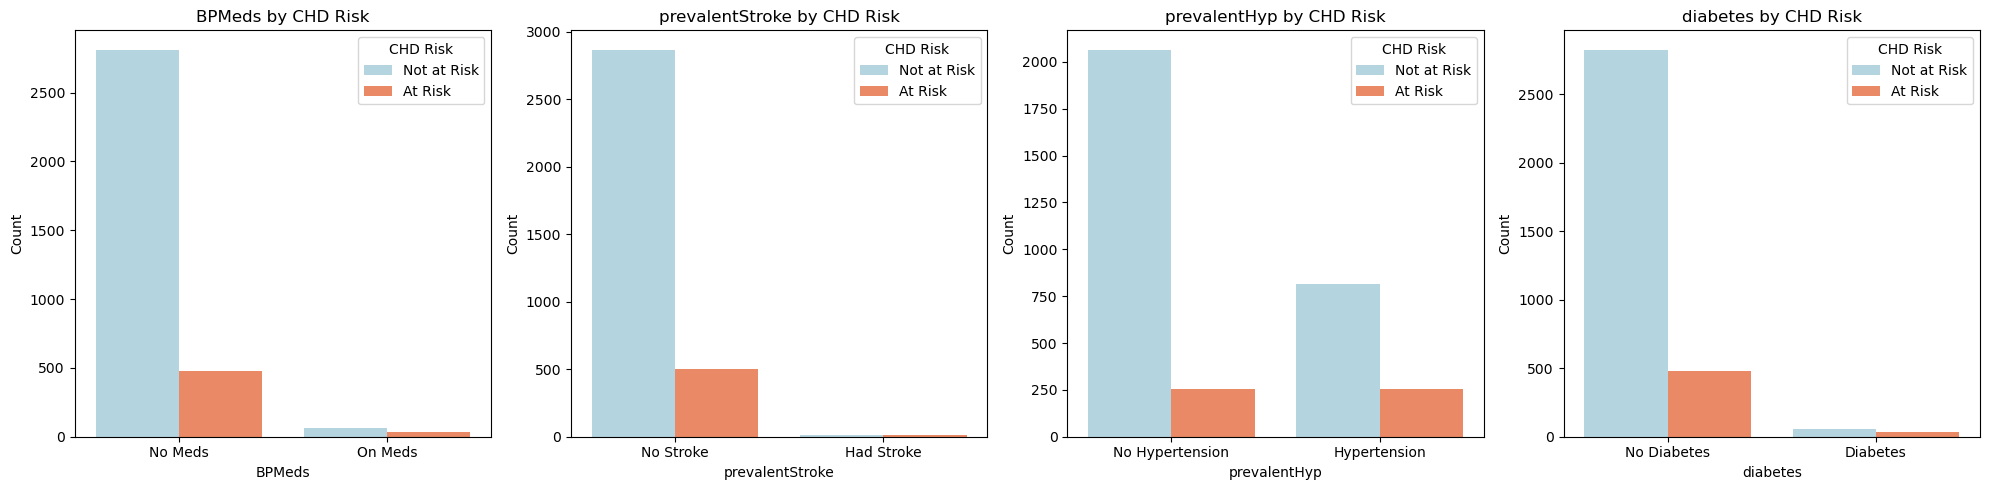

In [ ]:
medical_factors = ["BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
factor_labels = {
    "BPMeds": ["No Meds", "On Meds"],
    "prevalentStroke": ["No Stroke", "Had Stroke"],
    "prevalentHyp": ["No Hypertension", "Hypertension"],
    "diabetes": ["No Diabetes", "Diabetes"],
}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, factor in enumerate(medical_factors):
    sns.countplot(
        x=factor,
        hue="TenYearCHD",
        data=df_train_copy,
        palette=["lightblue", "coral"],
        ax=axes[i],
    )
    axes[i].set_title(f"{factor} by CHD Risk")
    axes[i].set_xlabel(f"{factor}")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="CHD Risk", labels=["Not at Risk", "At Risk"])

    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(factor_labels[factor])

plt.tight_layout()
plt.show()

Observations from Health Conditions and CHD Risk:
- Most people "Not at Risk" do not take blood pressure medications and have not had a stroke, hypertension, or diabetes.
- Conversely, a significant number of people "At Risk" have hypertension, while fewer are on blood pressure medications, have had a stroke, or diabetes.

Pairplot of Medical Measurements by CHD Risk

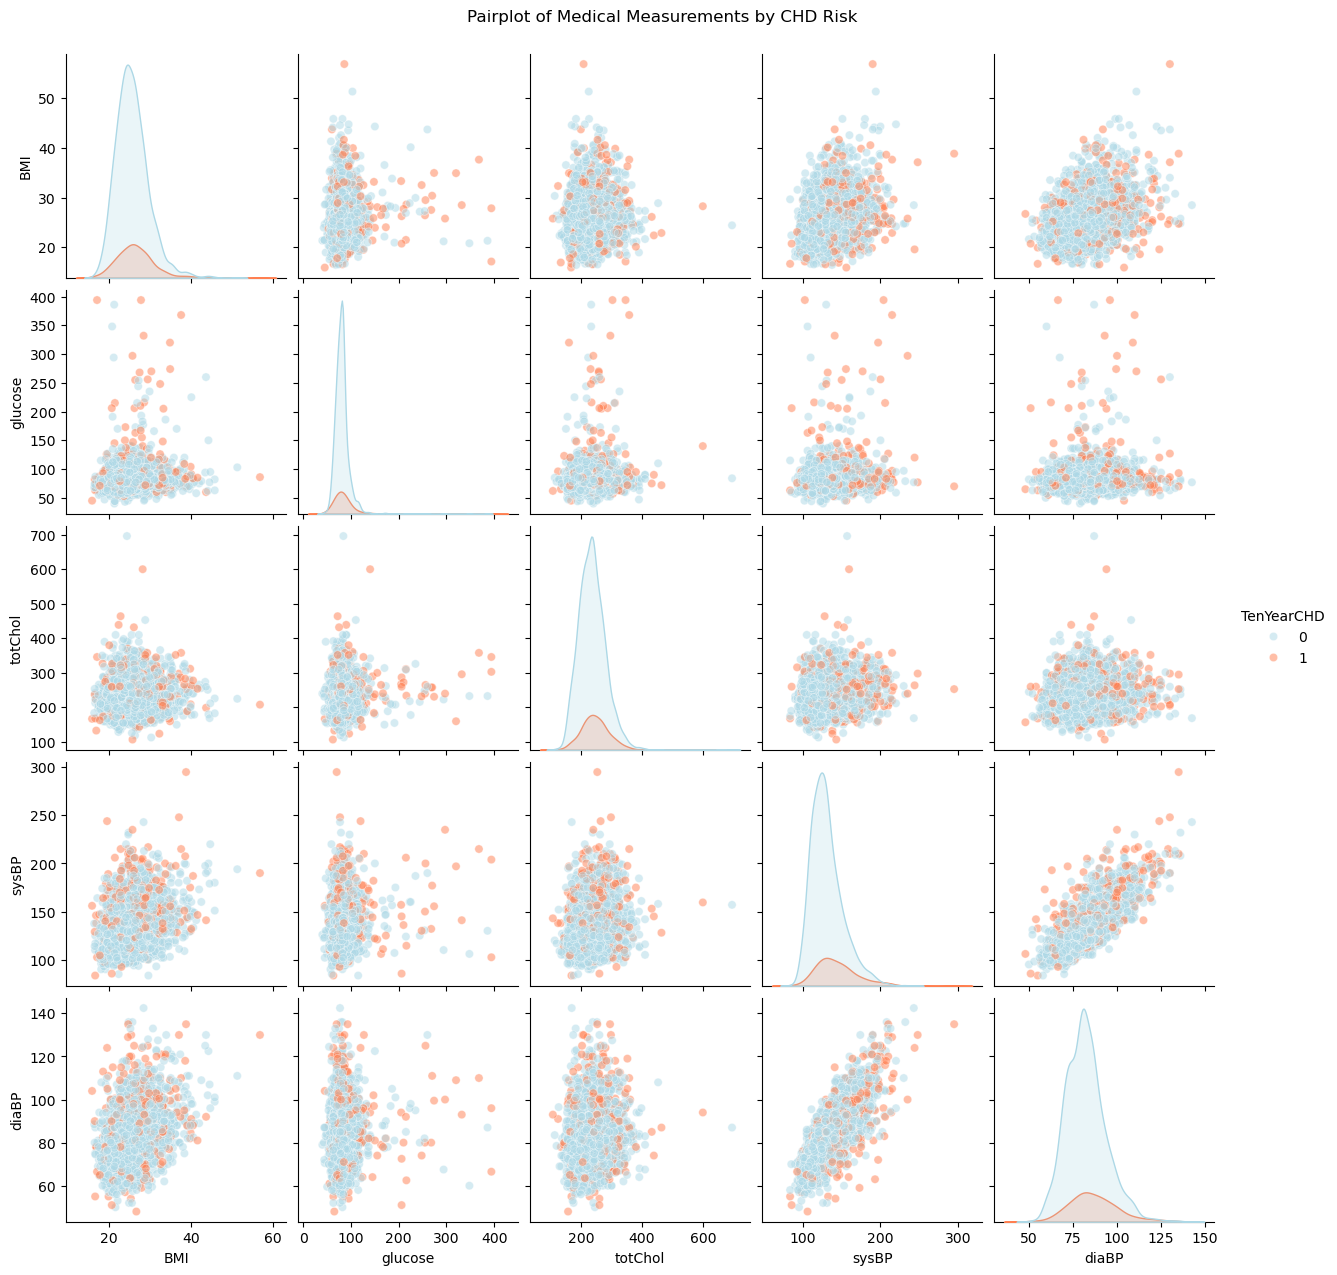

In [ ]:
medical_features = ["BMI", "glucose", "totChol", "sysBP", "diaBP"]

g = sns.pairplot(
    df_train_copy,
    vars=medical_features,
    hue="TenYearCHD",
    palette=["lightblue", "coral"],
    diag_kind="kde",
    plot_kws={"alpha": 0.5},
)
plt.suptitle("Pairplot of Medical Measurements by CHD Risk", y=1.02)
plt.show()

- Overlapping Points: The red (CHD risk) and blue (no CHD risk) points are largely mixed, making it difficult to separate the two groups just by looking.
- No Clear Clusters: No obvious, distinct clusters indicate a clear separation between at-risk and not-at-risk individuals.
- Need for Further Analysis:
Statistical tests (e.g., t-tests) or machine learning models (e.g., logistic regression) would help quantify relationships better.

### T-test 

In [ ]:
medical_features = ["BMI", "glucose", "totChol", "sysBP", "diaBP"]

for col in medical_features:
    at_risk = df_train_copy[df_train_copy["TenYearCHD"] == 1][col].dropna()
    not_at_risk = df_train_copy[df_train_copy["TenYearCHD"] == 0][col].dropna()

    t_stat, p_value = ttest_ind(at_risk, not_at_risk, equal_var=False)
    print(f"{col}: t-stat={t_stat:.2f}, p-value={p_value:.4f}")

BMI: t-stat=3.55, p-value=0.0004
glucose: t-stat=4.67, p-value=0.0000
totChol: t-stat=5.07, p-value=0.0000
sysBP: t-stat=10.53, p-value=0.0000
diaBP: t-stat=6.95, p-value=0.0000


These results underscore that individuals at risk for CHD tend to have significantly higher BMI, glucose, total cholesterol, systolic, and diastolic blood pressure levels. This reinforces the importance of monitoring these health indicators in managing and reducing CHD risk.

Correlation Analysis


Strongly Positively Correlated Features:
        Feature_1     Feature_2  Correlation
6     cigsPerDay    is_smoking     0.772261
11  prevalentHyp         sysBP     0.699285
14      diabetes       glucose     0.620211
19         diaBP  prevalentHyp     0.612897
20         diaBP         sysBP     0.781908

There aren't strongly negatively correlated features.


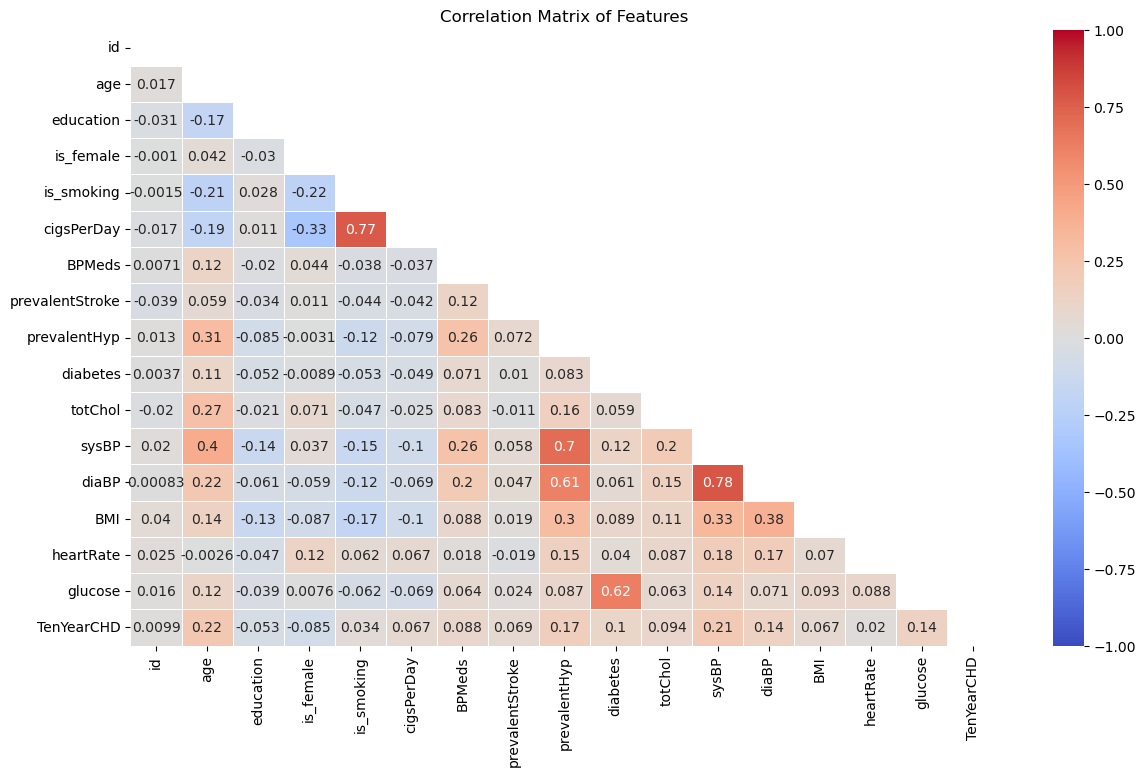

In [ ]:
def correlation_analysis(df_train_copy):

    correlation_matrix = df_train_copy.corr(numeric_only=True)

    def extract_unique_correlations(corr_matrix, condition):
        """Extract unique correlation pairs based on a condition."""
        correlations = corr_matrix[condition].stack().reset_index()
        correlations.columns = ["Feature_1", "Feature_2", "Correlation"]
        correlations = correlations[
            correlations["Feature_1"] != correlations["Feature_2"]
        ]
        correlations = correlations[
            correlations["Feature_1"] < correlations["Feature_2"]
        ]
        return correlations

    strong_positive = extract_unique_correlations(
        correlation_matrix, correlation_matrix > 0.5
    )
    if strong_positive.empty:
        print("\nThere aren't strongly Positively correlated features.")
    else:
        print("\nStrongly Positively Correlated Features:\n", strong_positive)

    strong_negative = extract_unique_correlations(
        correlation_matrix, correlation_matrix < -0.5
    )
    if strong_negative.empty:
        print("\nThere aren't strongly negatively correlated features.")
    else:
        print("\nStrongly Negatively Correlated Features:\n", strong_negative)

    plt.figure(figsize=(14, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        linewidths=0.5,
        mask=mask,
        vmin=-1,
        vmax=1,
    )
    plt.title("Correlation Matrix of Features")
    plt.show()


correlation_analysis(df_train)

Hypertension & Blood Pressure (r = 0.70 & 0.61)
 - Prevalent hypertension (prevalentHyp) is strongly linked to systolic (sysBP) and diastolic (diaBP) blood pressure, which makes sense because hypertension is defined by high blood pressure.
 
 Diabetes & Glucose (r = 0.62)
 - People with higher glucose levels are more likely to have diabetes.
 
 Smoking & Cigarettes per Day (r = 0.77)
  - Strong correlation makes sense because smoking status is naturally linked to the number of cigarettes smoked per day. 

Glucose distributions between diabetics and non-diabetics

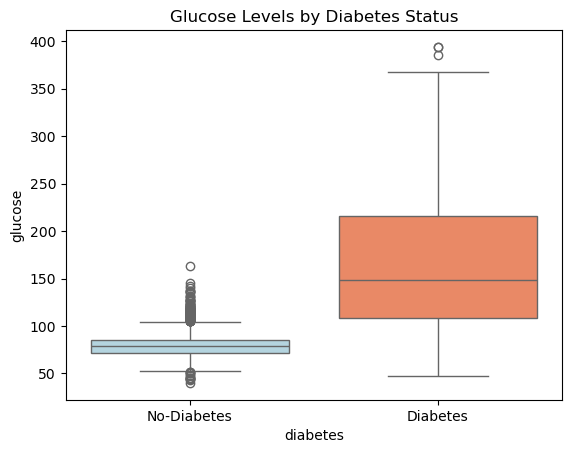

In [ ]:
ax = sns.boxplot(
    x="diabetes",
    y="glucose",
    hue="diabetes",
    data=df_train_copy,
    palette=["lightblue", "coral"],
    legend=False,
)
ax.set_xticks([0, 1])
ax.set_xticklabels(["No-Diabetes", "Diabetes"])
plt.title("Glucose Levels by Diabetes Status")
plt.show()

- Higher Glucose Levels in Diabetics: Individuals with diabetes have significantly higher glucose levels compared to those without diabetes, as indicated by the higher median and interquartile range (IQR) in the "Diabetes" category.
- No Overlap: The IQRs of the two groups do not overlap, clearly showing a distinction in glucose levels between individuals with and without diabetes.
- Outliers in Non-Diabetics: There are several outliers in the "No-Diabetes" group, with glucose levels both above and below the whiskers, highlighting some variability in glucose levels among non-diabetics.

**Medical History and Current Conditions conclusions**

Based on the analysis, hypertension stands out as a significant medical history factor associated with a higher risk of CHD. The data indicates that individuals with hypertension exhibit a strong correlation with both systolic and diastolic blood pressure, making it a key predictor of CHD risk. In contrast, diabetes shows a weaker correlation with CHD risk, suggesting its impact is less pronounced in this context.

When examining current medical measurements, the analysis reveals that individuals "At Risk" for CHD generally present higher blood pressure and glucose levels compared to those "Not at Risk." However, there is no notable difference in BMI between the two groups. These findings highlight the importance of monitoring blood pressure and glucose levels in assessing CHD risk.

Overall, the analysis underscores the need for further statistical tests or machine learning models to better quantify the relationships between these medical factors and CHD risk.


**Key Predictors of 10-Year CHD Risk**

- Demographics and Risks:
    - Sex Impact: Men are at a higher risk of CHD compared to women.
    - Age Impact: CHD risk increases with age, peaking around 55-60 years. The majority "Not at Risk" are aged 45-50.

- Behavioral Factors:
    - Smoking Status: Correlates with higher cholesterol, blood pressure, and glucose levels. The number of cigarettes per day does not significantly impact these health indicators.

- Medical History and Current Conditions:
    - Hypertension: Stands out as a significant medical history factor associated with a higher risk of CHD, with strong correlations observed with both systolic and diastolic blood pressure.
    - Diabetes: Shows a weaker correlation with CHD risk.
    - Health Measurements: Individuals "At Risk" for CHD generally have higher blood pressure and glucose levels, with no notable difference in BMI between the two groups.

Overall, your analysis highlights the importance of sex, age, smoking status, hypertension, and glucose levels as key predictors of CHD risk. Further statistical tests or machine learning models are recommended to better quantify these relationships.

# Logistic Regression

Logistic Regression: Since target variable (10-year risk of CHD) is binary, logistic regression is a suitable choice.
Spliting the data into training and testing sets to evaluate the model's performance.

# Model 1 - Base Logistic Regression

This model uses logistic regression with various demographic and health-related features.

In [ ]:
columns_to_scale = ["BMI", "glucose", "totChol", "sysBP", "diaBP"]

df_train_finalcopy = df_train_copy.copy()

In [ ]:
y = df_train_finalcopy["TenYearCHD"]
X = df_train_finalcopy[
    [
        "age",
        "is_female",
        "cigsPerDay",
        "BPMeds",
        "prevalentStroke",
        "prevalentHyp",
        "diabetes",
        "totChol",
        "sysBP",
        "BMI",
        "heartRate",
        "glucose",
        "diaBP",
    ]
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape)
print(X_test.shape)

(2712, 13)
(678, 13)


Handling missing values (imputation on train only, transform test) and then Standardize features (fit on train, transform test)

In [351]:
imputer = SimpleImputer(strategy="median")
X_train[columns_to_scale] = imputer.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = imputer.transform(X_test[columns_to_scale])

In [352]:
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [353]:
log_reg_v1 = LogisticRegression(max_iter=5000)

log_reg_v1.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [354]:
X_train_sm = sm.add_constant(X_train)

log_reg_sm = sm.Logit(y_train, X_train_sm).fit(disp=0)

In [355]:
y_pred_v1 = log_reg_v1.predict(X_test)
print("Classification Report\n\n", classification_report(y_test, y_pred_v1))

Classification Report

               precision    recall  f1-score   support

           0       0.86      1.00      0.92       576
           1       0.86      0.06      0.11       102

    accuracy                           0.86       678
   macro avg       0.86      0.53      0.52       678
weighted avg       0.86      0.86      0.80       678



Classification Report:

- Precision: The precision for both classes is high at 0.86, indicating that the model is accurate when it predicts positive cases.
- Recall: The recall is very high (1.0) for the "No" class but extremely low (0.06) for the "Yes" class, meaning the model misses most of the true positive cases.
- F1-Score: The F1-score for the "No" class is high (0.92), but very low for the "Yes" class (0.11).

The overall accuracy is 0.86, but this is misleading due to the class imbalance. The high accuracy is driven by the correct identification of the majority class (no disease).


In [ ]:
cm_v1 = confusion_matrix(y_test, y_pred_v1)

cm_df_v1 = pd.DataFrame(
    cm_v1, index=["Actual No", "Actual Yes"], columns=["Predicted No", "Predicted Yes"]
)

print("Confusion Matrix\n")
print(cm_df_v1)

Confusion Matrix

            Predicted No  Predicted Yes
Actual No            575              1
Actual Yes            96              6


- Strenght: Model 1 correctly predicts most of the negative cases (575 out of 576).
- Weaknesses: It fails to identify the majority of the positive cases (only 6 out of 102 are correctly predicted).

This high number of false negatives (96) highlights the model's poor recall for the minority class (disease).

Cross validation - Implements k-fold cross-validation to ensure model's robustness and generalizability.
Using metric Recall: it is crucial to correctly identify as many cases of cardiovascular diseases as possible, reducing the number of false negatives.

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(log_reg_v1, X_train, y_train, cv=cv, scoring="recall")

print(f"Cross-Validation Recall Scores: {[f'{score:.2f}' for score in scores]}")
print(f"Mean Recall: {scores.mean():.2f}")

Cross-Validation Recall Scores: ['0.09', '0.09', '0.11', '0.06', '0.06']
Mean Recall: 0.08


- The cross-validation recall scores for Model 1 are consistently low across all folds, indicating that the model has difficulty identifying positive cases of cardiovascular disease.
- The mean recall of 0.08 reflects the poor performance in terms of recall for the minority class (disease).
- This low recall suggests that the model may not be suitable for scenarios where identifying positive cases is crucial.

Feature importance for base model

In [ ]:
intercept = log_reg_v1.intercept_[0]
coefficients = np.concatenate(([intercept], log_reg_v1.coef_.flatten()))

standard_errors = np.sqrt(np.diag(log_reg_sm.cov_params()))

t_values = coefficients / standard_errors

p_values = [2 * (1 - norm.cdf(np.abs(t_val))) for t_val in t_values]

summary_table = pd.DataFrame(
    {
        "Feature": ["Intercept"] + X_train.columns.tolist(),
        "Coefficient": coefficients,
        "Standard Error": standard_errors,
        "t-value": t_values,
        "p-value": p_values,
    }
)
summary_table = summary_table.round(2)
print(summary_table)

            Feature  Coefficient  Standard Error  t-value  p-value
0         Intercept        -4.46            0.58    -7.72     0.00
1               age         0.06            0.01     7.13     0.00
2         is_female        -0.51            0.13    -3.99     0.00
3        cigsPerDay         0.03            0.00     5.08     0.00
4            BPMeds         0.00            0.28     0.01     0.99
5   prevalentStroke         0.66            0.52     1.27     0.20
6      prevalentHyp         0.23            0.16     1.41     0.16
7          diabetes         0.22            0.36     0.63     0.53
8           totChol         0.11            0.06     2.02     0.04
9             sysBP         0.36            0.10     3.66     0.00
10              BMI        -0.01            0.06    -0.12     0.91
11        heartRate        -0.00            0.00    -0.84     0.40
12          glucose         0.19            0.06     3.09     0.00
13            diaBP        -0.01            0.09    -0.06     

These coefficients indicate which features are associated with an increased or decreased risk of cardiovascular diseases.

- Significant predictors: Age, Is_female, CigsPerDay, TotChol, SysBP, Glucose.
- Non-significant predictors: BPMeds, PrevalentStroke, PrevalentHyp, Diabetes, BMI, HeartRate, DiaBP.

### Model 1 conclusions 
Basic Logistic Regressionmodel performs well in predicting the majority class (no disease), but it struggles with identifying the minority class (disease), as indicated by the low recall for class 1. This makes it less suitable for your context where detecting positive cases is crucial.

# Model 2 - Logistic Regression with Balanced Class Weights

This model addresses class imbalance by using balanced class weights, improving the detection of positive cases.

Balanced - apply class_weight='balanced' to the logistic regression model to address the class imbalance in the dataset. This adjustment aims to improve the model's ability to correctly identify CHD risk by giving more importance to the minority class, potentially enhancing recall for positive cases.

In [ ]:
log_reg_v2 = LogisticRegression(class_weight="balanced", max_iter=5000)

log_reg_v2.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [ ]:
y_pred_v2 = log_reg_v2.predict(X_test)

cm_v2 = confusion_matrix(y_test, y_pred_v2)

cm_df_v2 = pd.DataFrame(
    cm_v2, index=["Actual No", "Actual Yes"], columns=["Predicted No", "Predicted Yes"]
)

print("Confusion Matrix\n")
print(cm_df_v2)

Confusion Matrix

            Predicted No  Predicted Yes
Actual No            416            160
Actual Yes            34             68


- Strenghts: Model 2 correctly predicts a good portion of both negative (416 out of 576) and positive cases (68 out of 102). It reduces the number of false negatives (34) compared to Model 1, showing an improved recall for the minority class (disease).
- weaknesses: However, it increases the number of false positives (160), indicating a trade-off in precision for class 0.

This indicates a better performance in predicting the "Yes" class for CHD compared to Model 1, but with more false positives.

In [361]:
print("Classification Report\n\n", classification_report(y_test, y_pred_v2))

Classification Report

               precision    recall  f1-score   support

           0       0.92      0.72      0.81       576
           1       0.30      0.67      0.41       102

    accuracy                           0.71       678
   macro avg       0.61      0.69      0.61       678
weighted avg       0.83      0.71      0.75       678



Classification Report:

- Precision: The precision for class 0 is high at 0.92, indicating that most of the predicted negative cases are truly negative. The precision for class 1 is lower at 0.30, meaning there are more false positives.
- Recall: The recall for class 0 is 0.72, showing that the model correctly identifies most negative cases. For class 1 is significantly improved at 0.67, meaning the model correctly identifies a larger portion of positive cases compared to Model 1.
- F1-Score: The f1-score for class 0 is 0.81, indicating good overall performance for negative cases. For class 1 is 0.41, showing improved but still modest performance for positive cases.

The overall accuracy is 0.71, indicating that the balanced model performs reasonably well in classifying both positive and negative cases.

Focusing on recall: using cross-validation and calculating the recall scores for the model.

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(log_reg_v2, X_train, y_train, cv=cv, scoring="recall")

print(f"Cross-Validation Recall Scores: {[f'{score:.2f}' for score in scores]}")
print(f"Mean Recall: {scores.mean():.2f}")

Cross-Validation Recall Scores: ['0.73', '0.66', '0.64', '0.65', '0.65']
Mean Recall: 0.66


- The cross-validation recall scores for Model 2 show a significant improvement compared to Model 1, with recall scores consistently above 0.60.
- The mean recall of 0.66 indicates that this model is better at identifying positive cases of cardiovascular disease.
- This improvement suggests that balancing class weights helps the model perform better in detecting the minority class (disease), making it a more suitable choice for this context.

Feature importance for balanced model

In [ ]:
intercept = log_reg_v2.intercept_[0]
coefficients = np.concatenate(([intercept], log_reg_v2.coef_.flatten()))

standard_errors = np.sqrt(np.diag(log_reg_sm.cov_params()))

t_values = coefficients / standard_errors

p_values = [2 * (1 - norm.cdf(np.abs(t_val))) for t_val in t_values]

summary_table = pd.DataFrame(
    {
        "Feature": ["Intercept"] + X_train.columns.tolist(),
        "Coefficient": coefficients,
        "Standard Error": standard_errors,
        "t-value": t_values,
        "p-value": p_values,
    }
)

summary_table = summary_table.round(2)

print(summary_table)

            Feature  Coefficient  Standard Error  t-value  p-value
0         Intercept        -2.86            0.58    -4.96     0.00
1               age         0.06            0.01     7.44     0.00
2         is_female        -0.42            0.13    -3.33     0.00
3        cigsPerDay         0.03            0.00     5.54     0.00
4            BPMeds         0.10            0.28     0.34     0.73
5   prevalentStroke         0.60            0.52     1.15     0.25
6      prevalentHyp         0.22            0.16     1.39     0.16
7          diabetes         0.33            0.36     0.92     0.36
8           totChol         0.13            0.06     2.28     0.02
9             sysBP         0.31            0.10     3.12     0.00
10              BMI        -0.00            0.06    -0.04     0.97
11        heartRate        -0.00            0.00    -1.00     0.32
12          glucose         0.14            0.06     2.31     0.02
13            diaBP         0.04            0.09     0.49     

Significant predictors remain consistent similarry to Model 1, indicating their importance in predicting cardiovascular diseases.
- Significant predictors: Age, Is_female, CigsPerDay, TotChol, SysBP, Glucose.
- Non-significant predictors: BPMeds, PrevalentStroke, PrevalentHyp, Diabetes, BMI, HeartRate, DiaBP.

### Model 2 conclusion

The balanced class weights model significantly improves the recall for class 1 (mean recall of 0.66), but at the expense of some precision for class 0. This model offers a better balance between precision and recall. The class balancing technique helps to improve the performance on the minority class but has a trade-off in terms of precision. 

# Model 3 - Adjusted Threshold with Logistic Regression

This model further adjusts the threshold for predicting positive cases, aiming to enhance recall even more.

Predicting probabilities for the test set

In [ ]:
y_prob_3 = log_reg_v2.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_v3 = (y_prob_3 >= 0.3).astype(int)

cm_v3 = confusion_matrix(y_test, y_pred_v3)

cm_df_v3 = pd.DataFrame(
    cm_v3, index=["Actual No", "Actual Yes"], columns=["Predicted No", "Predicted Yes"]
)

print("Confusion Matrix\n")
print(cm_df_v3)

Confusion Matrix

            Predicted No  Predicted Yes
Actual No            189            387
Actual Yes            14             88


- Strenght: Model 3 achieves the highest recall for the minority class (disease), correctly predicting 88 out of 102 positive cases.
- Weaknesses: It significantly reduces the number of false negatives (14), but at the expense of a high number of false positives (387).

This trade-off results in lower overall accuracy, but it is effective in identifying most of the positive cases.

In [366]:
print("Classification Report\n\n", classification_report(y_test, y_pred_v3))

Classification Report

               precision    recall  f1-score   support

           0       0.93      0.33      0.49       576
           1       0.19      0.86      0.31       102

    accuracy                           0.41       678
   macro avg       0.56      0.60      0.40       678
weighted avg       0.82      0.41      0.46       678



Classification Report:

- Precision: The precision for the "No" class is 0.93, but for the "Yes" class, it is low at 0.19. This means that when the model predicts a "Yes," it is often incorrect.
- Recall: The recall for the "Yes" class is much higher at 0.86, which is a significant improvement, showing the model's ability to identify most positive cases correctly. The recall for the "No" class is 0.31.
- F1-Score: The F1-score for the "No" class is 0.49, and for the "Yes" class, it is 0.31. The F1-score for the "Yes" class is still low, indicating room for improvement.

Accuracy: The overall accuracy is 0.41, indicating that the model's increased false positives impact its overall performance.

Cross-validation - manual cross-validation to apply a custom threshold, requiring explicit train and test splits within each fold.

In [ ]:
def adjusted_threshold_predict(proba, threshold=0.3):
    return (proba[:, 1] >= threshold).astype(int)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

recall_scores = []

for train_idx, test_idx in cv.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    log_reg_v2.fit(X_train_cv, y_train_cv)

    proba = log_reg_v2.predict_proba(X_test_cv)

    y_pred = adjusted_threshold_predict(proba, threshold=0.3)

    recall = recall_score(y_test_cv, y_pred)
    recall_scores.append(recall)

mean_recall = np.mean(recall_scores)

print(f"Cross-Validation Recall Scores: {[f'{score:.2f}' for score in recall_scores]}")
print(f"Mean Cross-Validation Recall: {mean_recall:.2f}")

Cross-Validation Recall Scores: ['0.96', '0.90', '0.90', '0.93', '0.89']
Mean Cross-Validation Recall: 0.92


- The cross-validation recall scores for Model 3 are the highest among the three models, with scores consistently above 0.89.
- The mean recall of 0.92 indicates that this model is very effective at identifying positive cases of cardiovascular disease.
- The high recall scores suggest that adjusting the threshold to 0.3 significantly improves the model's ability to detect the minority class (disease), making it the best choice if the primary goal is to minimize false negatives.

### Model 3 conclusions
Adjusted Threshold model excels in identifying the minority class (disease) with the highest recall among the three models. However, this comes at the cost of increased false positives, leading to lower overall precision and accuracy.

### Visuals for model 1-3 conclusions:
Model 1 is good for predicting the absence of CHD, but fails at predicting its presence.

Model 2 improves CHD presence detection by balancing class weights, but sacrifices precision.

Model 3 maximizes recall for CHD presence, but at the cost of precision and overall accuracy, making it useful when identifying as many true positives as possible is critical.

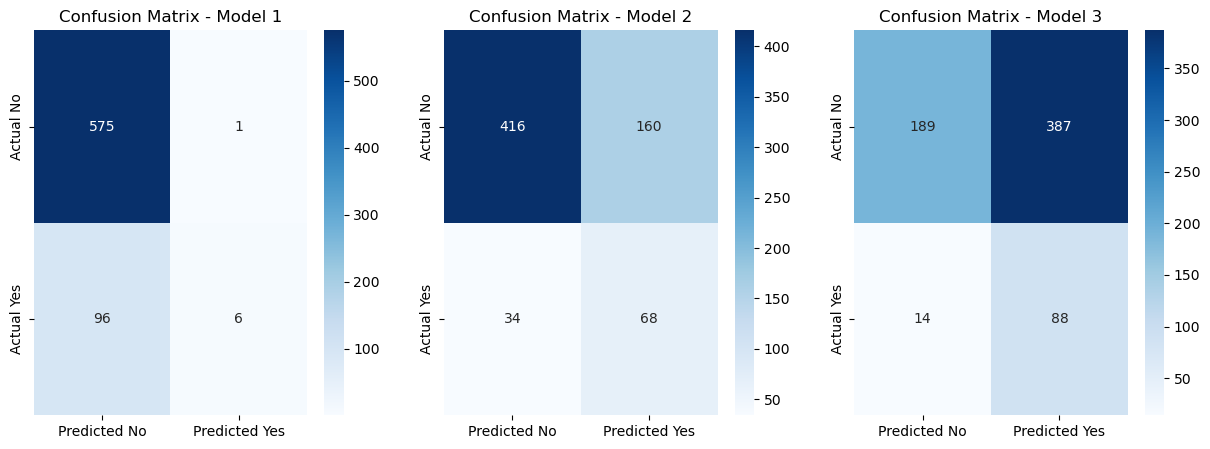

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_df_v1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Model 1")

sns.heatmap(cm_df_v2, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix - Model 2")

sns.heatmap(cm_df_v3, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Confusion Matrix - Model 3")

plt.show()

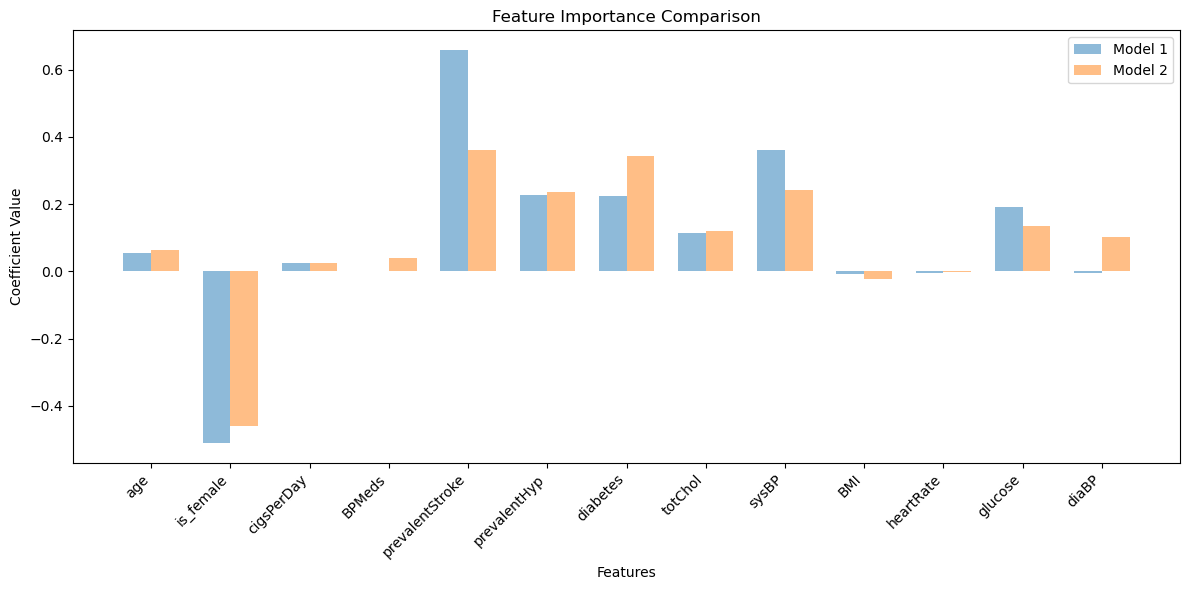

In [ ]:
coef_1 = log_reg_v1.coef_.flatten()
coef_2 = log_reg_v2.coef_.flatten()

features = X_train.columns

x = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width / 2, coef_1, width, label="Model 1", alpha=0.5)
bars2 = ax.bar(x + width / 2, coef_2, width, label="Model 2", alpha=0.5)

ax.set_xlabel("Features")
ax.set_ylabel("Coefficient Value")
ax.set_title("Feature Importance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()

- Similarities: The coefficients between Model 1 and Model 2 are quite similar, indicating that balancing the class weights did not drastically change the importance of most features.
- Sensitivity Improvement: Balancing the class weights helped improve the model's sensitivity to detecting cardiovascular heart disease (CHD) without significantly altering feature importance.
- Slight Differences: There are slight differences in the coefficients for sex and stroke, suggesting that balancing the class weights caused the model to re-evaluate the importance of these features, focusing more on those that help detect positive cases.

As the model coefficients will be the same for both Models 2 and 3, plotting them again won't show any additional insights.

ROC AUC and curves for all three models

ROC AUC (Model 1): 0.721
ROC AUC (Model 2): 0.722
ROC AUC (Model 3): 0.722


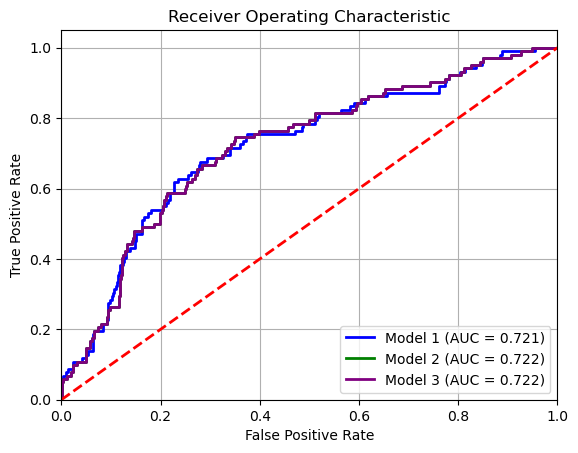

In [ ]:
y_pred_prob_v1 = log_reg_v1.predict_proba(X_test)[:, 1]
roc_auc_v1 = roc_auc_score(y_test, y_pred_prob_v1)
print(f"ROC AUC (Model 1): {roc_auc_v1:.3f}")

y_pred_prob_v2 = log_reg_v2.predict_proba(X_test)[:, 1]
roc_auc_v2 = roc_auc_score(y_test, y_pred_prob_v2)
print(f"ROC AUC (Model 2): {roc_auc_v2:.3f}")

threshold = 0.3
y_pred_prob_v3 = log_reg_v2.predict_proba(X_test)[:, 1]
y_pred_v3 = (y_pred_prob_v3 >= threshold).astype(int)
roc_auc_v3 = roc_auc_score(y_test, y_pred_prob_v3)
print(f"ROC AUC (Model 3): {roc_auc_v3:.3f}")

fpr_v1, tpr_v1, _ = roc_curve(y_test, y_pred_prob_v1)
fpr_v2, tpr_v2, _ = roc_curve(y_test, y_pred_prob_v2)
fpr_v3, tpr_v3, _ = roc_curve(y_test, y_pred_prob_v3)

plt.figure()
plt.plot(fpr_v1, tpr_v1, color="blue", lw=2, label=f"Model 1 (AUC = {roc_auc_v1:.3f})")
plt.plot(fpr_v2, tpr_v2, color="green", lw=2, label=f"Model 2 (AUC = {roc_auc_v2:.3f})")
plt.plot(
    fpr_v3, tpr_v3, color="purple", lw=2, label=f"Model 3 (AUC = {roc_auc_v3:.3f})"
)
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ROC AUC (Model 1): 0.721
ROC AUC (Model 2): 0.722
ROC AUC (Model 3): 0.722


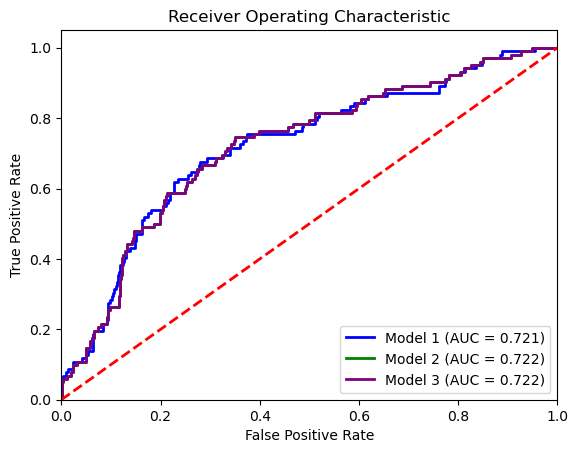

In [ ]:
y_pred_prob_v1 = log_reg_v1.predict_proba(X_test)[:, 1]
roc_auc_v1 = roc_auc_score(y_test, y_pred_prob_v1)
print(f"ROC AUC (Model 1): {roc_auc_v1:.3f}")

y_pred_prob_v2 = log_reg_v2.predict_proba(X_test)[:, 1]
roc_auc_v2 = roc_auc_score(y_test, y_pred_prob_v2)
print(f"ROC AUC (Model 2): {roc_auc_v2:.3f}")

y_prob_3 = log_reg_v2.predict_proba(X_test)[:, 1]
roc_auc_v3 = roc_auc_score(y_test, y_prob_3)
print(f"ROC AUC (Model 3): {roc_auc_v3:.3f}")

fpr_v1, tpr_v1, _ = roc_curve(y_test, y_pred_prob_v1)
fpr_v2, tpr_v2, _ = roc_curve(y_test, y_pred_prob_v2)
fpr_v3, tpr_v3, _ = roc_curve(y_test, y_prob_3)

plt.figure()
plt.plot(fpr_v1, tpr_v1, color="blue", lw=2, label=f"Model 1 (AUC = {roc_auc_v1:.3f})")
plt.plot(fpr_v2, tpr_v2, color="green", lw=2, label=f"Model 2 (AUC = {roc_auc_v2:.3f})")
plt.plot(
    fpr_v3, tpr_v3, color="purple", lw=2, label=f"Model 3 (AUC = {roc_auc_v3:.3f})"
)
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

All three models have similar ROC AUC values (0.721, 0.722, 0.722) suggests that their overall ability to distinguish between classes is quite similar. This is despite the differences in recall and precision that were observed in the previous analyses.

# Conclusions
Model 1: Base Logistic Regression
- The basic logistic regression model performs well for class 0 (high precision and recall), but poorly for class 1 (low recall). This is indicated by the low mean recall score of 0.08.
- Model 1 (basic logistic regression) might not be suitable for context due to its low recall for class 1.

Model 2: Balanced Class Weights
- The balanced class weights model significantly improves the recall for class 1 (mean recall of 0.66), but at the expense of some precision for class 0. 
- Model 3 offers a better balance between precision and recall and is a solid choice for futher analyze.

Model 3: Adjusted Threshold (0.3)
- The adjusted threshold model achieves the highest recall for class 1 (mean recall of 0.92), but this comes at a cost of reduced precision and accuracy for class 0. The overall accuracy is lower due to the increased number of false positives.
- To maximaze recall, Model 3 is most effective

# Recommendations for futher analyses:
- Model 2 (Balanced Weights): For further analysis, adjusting class weights or hyperparameters (e.g., C) could help better balance recall and precision.
- Model 3 (Adjusted Threshold): Exploring thresholds between 0.3 and 0.5 might improve the balance between recall and precision.
- Alternative Models: Other algorithms, like tree-based models (Random Forest, Gradient Boosting), could be tested for potentially better results on imbalanced datasets.
- Precision-Recall Focus: F1-score could be prioritized over accuracy to better balance precision and recall.
- Feature Engineering: Exploring techniques like oversampling or undersampling might enhance model performance.